# **Crescimento Econômico dos BRICS: Tendências e Previsões**
Autor [Vinícius Oliveira](https://www.linkedin.com/in/vinicius-oliveira-p1/)

---

## **1\.Objetivo do Projeto**

O objetivo deste projeto é realizar uma **análise aprofundada da evolução econômica dos países BRICS**, com um foco especial no **Brasil**, o projeto abrange um ciclo completo de análise de dados, começando com o **processamento e a preparação meticulosa dos dados** para garantir a qualidade e a integridade das informações.

Serão conduzidas **análises exploratórias detalhadas** para identificar padrões e tendências econômicas, além disso, será desenvolvida uma **modelagem preditiva para o PIB do Brasil**, focando nos setores econômicos de **Agricultura, Silvicultura e Pesca**, bem como **Indústria**. Esta análise preditiva tem como objetivo fornecer uma visão aprofundada do crescimento econômico futuro, fundamentada em dados históricos e projeções.

O projeto também incluirá a criação de um **dashboard interativo no Looker Studio**, projetado para oferecer uma **visualização dinâmica e abrangente dos dados econômicos**.

A finalidade é facilitar a compreensão das **tendências e previsões econômicas**, tanto para o Brasil, promovendo uma interpretação clara e eficaz das informações econômicas.


### **1.1. TLDR**

 - **Dashboard**:
  - Looker Studio ([Link](https://lookerstudio.google.com/reporting/3ce9ae29-e201-4758-af5f-a601dcb67d30)).
 - **Processamento**:
  - Kaggle Notebook [Link](https://www.kaggle.com/code/vinciusoliveirap1/crescimento-econ-mico-dos-brics-tend-ncias-e-prev).
 - **Fontes**:
  - DataSet Kaggle da economia dos BRICS ([link](https://www.kaggle.com/datasets/docstein/brics-world-bank-indicators));
  - DataBank, onde os dados foram tirados ([link](https://databank.worldbank.org/)).

### **1.2. BRICS**

### O que é o BRICS?

**BRICS** é um acrônimo que representa um grupo de cinco países emergentes com economias em rápido crescimento e influência crescente no cenário global. O grupo é composto por:

- **Brasil**
- **Rússia**
- **Índia**
- **China**
- **África do Sul**

Estes países se destacam por suas economias grandes e diversificadas, e desempenham um papel significativo em várias questões econômicas e políticas globais.

#### **Objetivos e Importância**

O BRICS foi criado com o objetivo de promover a cooperação e o diálogo entre os países membros em áreas como comércio, investimentos e desenvolvimento econômico. O grupo busca reforçar a colaboração econômica, melhorar a representação das economias emergentes nas instituições globais e promover a reforma das instituições financeiras internacionais, como o Fundo Monetário Internacional (FMI) e o Banco Mundial.

#### **Características dos Países Membros**

- **Brasil**: A maior economia da América Latina, com um setor agrícola robusto e uma base industrial diversificada.
- **Rússia**: Um grande produtor de recursos naturais, especialmente petróleo e gás, com uma economia baseada na energia.
- **Índia**: Uma das economias que mais cresce no mundo, com um setor de serviços em expansão e um mercado interno grande.
- **China**: A segunda maior economia global, conhecida por seu papel central na manufatura e exportações, além de uma crescente influência no comércio global.
- **África do Sul**: O país mais industrializado da África, com um setor de mineração significativo e uma economia diversificada.

O BRICS desempenha um papel crucial na promoção do desenvolvimento sustentável e no apoio à integração econômica global, com o objetivo de criar um equilíbrio de poder mais equitativo no sistema econômico global.


## **2\. Pacotes e bibliotecas**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from google.colab import userdata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

### **2.1\.Configurando nossas API no COLAB, e realizando o download do dataset no Kaggle**





**NOTA:** As chaves de acesso devem ser configuradas no Colab previamente.

- **Como fazer isso?**<br>
No seu notebook, localize a aba à esquerda, onde há um ícone de chave. Clique no ícone da chave e selecione a opção "Adicionar novo secret". Crie duas chaves, denominadas "KAGGLE_KEY" e "KAGGLE_USERNAME", que devem corresponder à sua chave de acesso e ao seu nome de usuário do Kaggle, respectivamente.


In [2]:
# Criando uma pasta no Colab
!mkdir -p /content/data-brics

In [3]:
# Configurando nossos dados secrets do kaggle
os.environ["KAGGLE_KEY"] = userdata.get("KAGGLE_KEY")
os.environ["KAGGLE_USERNAME"] = userdata.get("KAGGLE_USERNAME")

In [4]:
# Fazendo o download do nosso DataSet Kaggle, em zip
!kaggle datasets download -d munyamdev/brics-economy-data -p /content/data-brics

Dataset URL: https://www.kaggle.com/datasets/munyamdev/brics-economy-data
License(s): MIT
  0% 0.00/933k [00:00<?, ?B/s]
100% 933k/933k [00:00<00:00, 42.0MB/s]


In [5]:
# Fazendo a descompactação do arquivo zip
!unzip -q /content/data-brics/brics-economy-data.zip -d /content/data-brics



> **Categoria: Aquisição de Dados**



## **3\. Data Wrangling**


#### **3.1\.Concatenação de carregamentos dos dados CSV**

In [6]:
# Indicando o caminho do diretório dos arquivos CSV
diretorio = "/content/data-brics"

>Com o diretório especificado, o próximo passo é listar e concatenar os arquivos CSV em um único DataFrame do Pandas. Isso garantirá que todos os dados estejam consolidados em uma única estrutura, facilitando a análise e manipulação subsequente.


In [7]:
# Listando os arquivos CSV
arquivos_csv = [x for x in os.listdir(diretorio) if x.endswith(".csv")]
# Carregar todos os arquivos CSV em uma lista de  DataFrames
arquivos_csv_list = [pd.read_csv(os.path.join(diretorio, y), delimiter =";") for y in arquivos_csv]
# Combinando todos os DataFrames em um único
brics_df = pd.concat(arquivos_csv_list, ignore_index=True)

In [8]:
brics_df.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Brazil,BRA,1970.0,450.0
1,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,China,CHN,1970.0,120.0
2,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,India,IND,1970.0,120.0
3,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Russian Federation,RUS,1970.0,NaN
4,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,South Africa,ZAF,1970.0,800.0


#### **3.2\.Limpeza dos Dados e preparação**

In [9]:
brics_df.loc[:, "Year"] = brics_df.loc[:, "Year"].astype(int)

##### **3.2.1\.Antes da limpeza dos dados**

In [10]:
shape_antes = brics_df.shape[0]
brics_df.shape

(86500, 6)

In [11]:
brics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86500 entries, 0 to 86499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   86350 non-null  object 
 1   SeriesCode   86250 non-null  object 
 2   CountryName  86250 non-null  object 
 3   CountryCode  86250 non-null  object 
 4   Year         86500 non-null  float64
 5   Value        60348 non-null  float64
dtypes: float64(2), object(4)
memory usage: 4.0+ MB


In [12]:
# Verificando as colunas que contém dados faltantes
brics_df.isnull().any()

,0
SeriesName,True
SeriesCode,True
CountryName,True
CountryCode,True
Year,False
Value,True


In [13]:
# Quantidade de dados faltantes em cada coluna
brics_df.isnull().sum()

,0
SeriesName,150
SeriesCode,250
CountryName,250
CountryCode,250
Year,0
Value,26152


##### **3.2.2\.Limpeza dos dados faltantes**

In [14]:
# Removendo os dados faltantes
brics_df.dropna(inplace=True)

In [15]:
# Removendo a coluna "SeriesCode" e "CountryCode"
brics_df = brics_df.drop(columns=["SeriesCode", "CountryCode"])

##### **3.2.3\.Após limpeza dos dados**

In [16]:
shape_apos = brics_df.shape[0]
brics_df.shape

(60348, 4)

In [17]:
brics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60348 entries, 0 to 86499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   60348 non-null  object 
 1   CountryName  60348 non-null  object 
 2   Year         60348 non-null  float64
 3   Value        60348 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


In [18]:
# Verificando as colunas que contém dados faltantes
brics_df.isnull().any()

,0
SeriesName,False
CountryName,False
Year,False
Value,False


In [19]:
dados_removidos = shape_antes - shape_apos
dados_removidos_porcentagem = (dados_removidos / shape_antes) * 100
print(f"Foram removidos {dados_removidos} dados faltantes.")
print(f"Foram removidos {dados_removidos_porcentagem:.2f}% dos dados")

Foram removidos 26152 dados faltantes.
Foram removidos 30.23% dos dados




> **Nota-se que uma quantidade significativa de dados faltantes foi removida do nosso DataFrame.**



### **3.2\.Criando novos DataFrames com os dados que temos interesse dos brics**

In [20]:
# Retirando somente o GDP ajustado pela inflação, expresso em dólares de 2010
gpd_const_year_df = brics_df.query("SeriesName == 'GDP (constant 2010 US$)'")
gpd_const_year_df.loc[:, "Value"] = gpd_const_year_df.loc[:, "Value"] / 1e12
gpd_const_year_df.head()

,SeriesName,CountryName,Year,Value
45450,GDP (constant 2010 US$),Brazil,1970.0,0.447443
45451,GDP (constant 2010 US$),China,1970.0,0.186994
45452,GDP (constant 2010 US$),India,1970.0,0.219862
45454,GDP (constant 2010 US$),South Africa,1970.0,0.137806
45455,GDP (constant 2010 US$),Brazil,1971.0,0.497982


In [21]:
# Retirando somente o GDP growth
gpd_growth_year_df = brics_df.query("SeriesName == 'GDP growth (annual %)'")
gpd_growth_year_df.head()

,SeriesName,CountryName,Year,Value
75750,GDP growth (annual %),Brazil,1970.0,8.769947
75751,GDP growth (annual %),China,1970.0,19.300000
75752,GDP growth (annual %),India,1970.0,5.157230
75754,GDP growth (annual %),South Africa,1970.0,5.248674
75755,GDP growth (annual %),Brazil,1971.0,11.295087


In [22]:
# Retirando somente o GDP per capita
gpd_per_capita_year_df = brics_df.query("SeriesName == 'GDP per capita growth (annual %)'")
gpd_per_capita_year_df.head()

,SeriesName,CountryName,Year,Value
27700,GDP per capita growth (annual %),Brazil,1970.0,6.063485
27701,GDP per capita growth (annual %),China,1970.0,16.050399
27702,GDP per capita growth (annual %),India,1970.0,2.864363
27704,GDP per capita growth (annual %),South Africa,1970.0,2.512748
27705,GDP per capita growth (annual %),Brazil,1971.0,8.589680


In [23]:
gni_year_df = brics_df.query("SeriesName == 'GNI per capita (constant 2010 US$)'")
gni_year_df.head()

,SeriesName,CountryName,Year,Value
66000,GNI per capita (constant 2010 US$),Brazil,1970.0,4639.124958
66002,GNI per capita (constant 2010 US$),India,1970.0,393.753120
66004,GNI per capita (constant 2010 US$),South Africa,1970.0,6068.391486
66005,GNI per capita (constant 2010 US$),Brazil,1971.0,5055.505932
66007,GNI per capita (constant 2010 US$),India,1971.0,391.385882


In [24]:
agriculture_year_df = brics_df.query("SeriesName == 'Agriculture, forestry, and fishing, value added (constant 2010 US$)' ")
agriculture_year_df.loc[:, "Value"] = agriculture_year_df.loc[:, "Value"] / 1e12
agriculture_year_df.head()

,SeriesName,CountryName,Year,Value
52200,"Agriculture, forestry, and fishing, value adde...",Brazil,1970.0,0.021958
52201,"Agriculture, forestry, and fishing, value adde...",China,1970.0,0.124831
52202,"Agriculture, forestry, and fishing, value adde...",India,1970.0,0.101245
52204,"Agriculture, forestry, and fishing, value adde...",South Africa,1970.0,0.003796
52205,"Agriculture, forestry, and fishing, value adde...",Brazil,1971.0,0.024188


In [25]:
manufacturing_year_df = brics_df.query("SeriesName == 'Industry (including construction), value added (current US$)'")
manufacturing_year_df.loc[:, "Value"] = manufacturing_year_df.loc[:, "Value"] / 1e12
manufacturing_year_df.head()

,SeriesName,CountryName,Year,Value
70250,"Industry (including construction), value added...",Brazil,1970.0,0.013623
70251,"Industry (including construction), value added...",China,1970.0,0.037294
70252,"Industry (including construction), value added...",India,1970.0,0.013564
70254,"Industry (including construction), value added...",South Africa,1970.0,0.006657
70255,"Industry (including construction), value added...",Brazil,1971.0,0.016101


## **4\.Análise Exploratória de Dados (EDA)**

Gráfico: Crescimento do PIB dos BRICS Ajustado pela Inflação<br>
Este gráfico ilustra o **crescimento do PIB dos países BRICS ajustado pela inflação** e expresso em **dólares de 2010**.

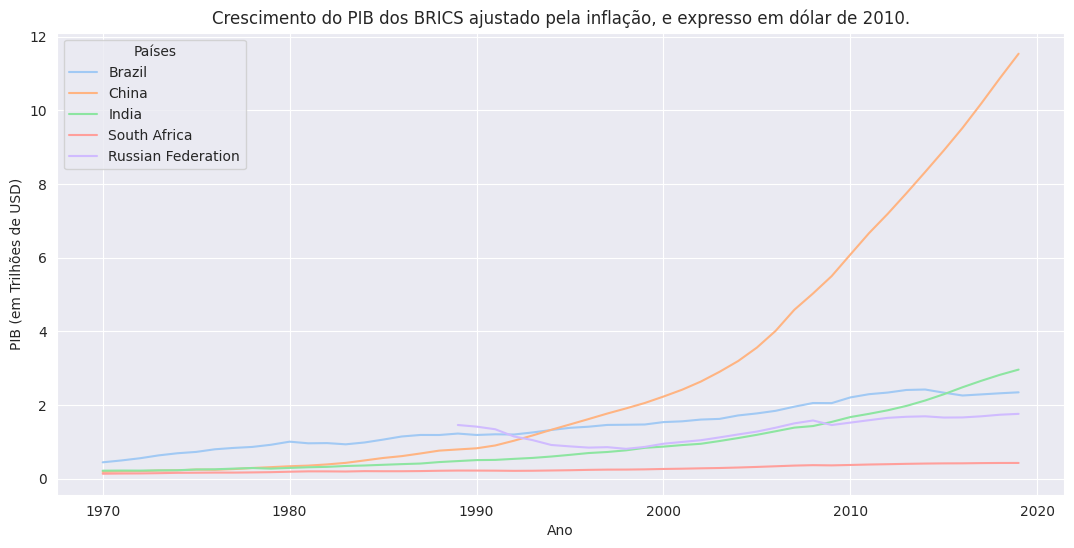

In [26]:
with sns.axes_style("darkgrid"):
  plt.figure(figsize=(13, 6))
  grafico = sns.lineplot(data=gpd_const_year_df, x="Year", y="Value", hue="CountryName", errorbar=None, palette="pastel")
  grafico.set(title="Crescimento do PIB dos BRICS ajustado pela inflação, e expresso em dólar de 2010.", xlabel="Ano", ylabel="PIB (em Trilhões de USD)")
  grafico.get_legend().set_title("Países")

>**Nota:** Observa-se um crescimento significativo no PIB da China a partir de 1990. <br>Este aumento acentuado reflete o rápido desenvolvimento econômico do país durante esse período, impulsionado por reformas econômicas e uma expansão industrial robusta.


O gráfico abaixo ilustra a porcentagem de crescimento do PIB dos países BRICS ao longo dos anos.

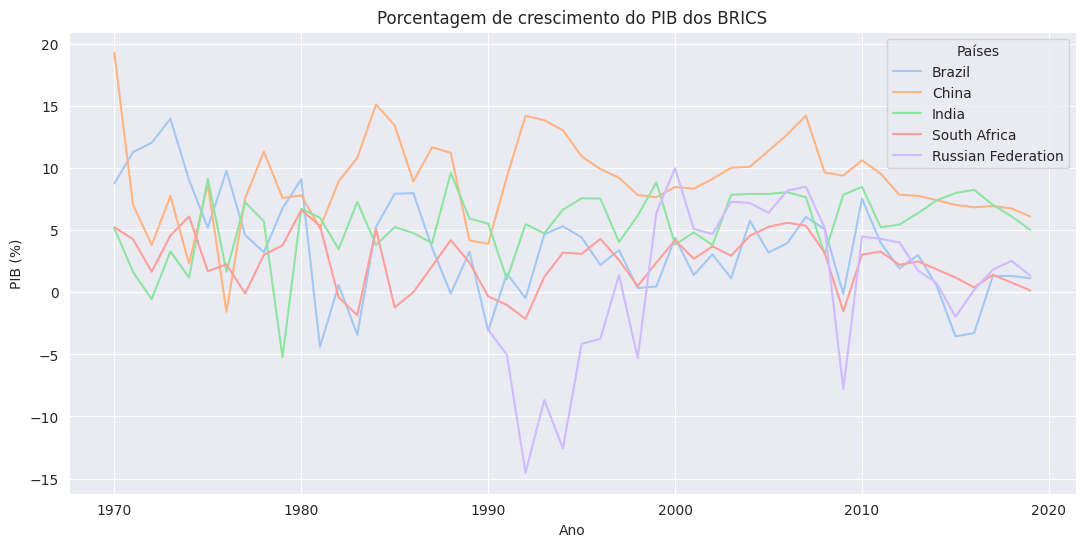

In [27]:
with sns.axes_style("darkgrid"):
  plt.figure(figsize=(13, 6))
  grafico = sns.lineplot(data=gpd_growth_year_df, x="Year", y="Value", hue="CountryName", errorbar=None, palette="pastel")
  grafico.set(title="Porcentagem de crescimento do PIB dos BRICS", xlabel="Ano", ylabel="PIB (%)")
  grafico.get_legend().set_title("Países")

O gráfico abaixo apresenta a evolução da renda per capita dos países BRICS ao longo dos anos.

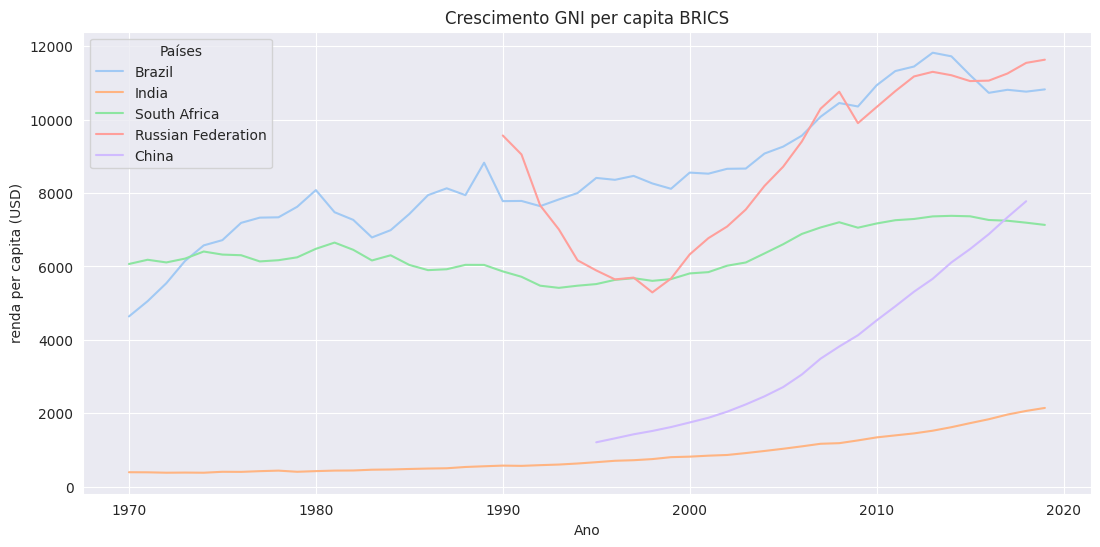

In [28]:
with sns.axes_style("darkgrid"):
  plt.figure(figsize=(13, 6))
  grafico = sns.lineplot(data=gni_year_df, x="Year", y="Value", hue="CountryName", errorbar=None, palette="pastel")
  grafico.set(title="Crescimento GNI per capita BRICS", xlabel="Ano", ylabel="renda per capita (USD)")
  grafico.get_legend().set_title("Países")

O gráfico abaixo ilustra o crescimento dos setores de Agricultura, Avicultura e Pesca nos países BRICS, expresso em dólares ajustados pela inflação.

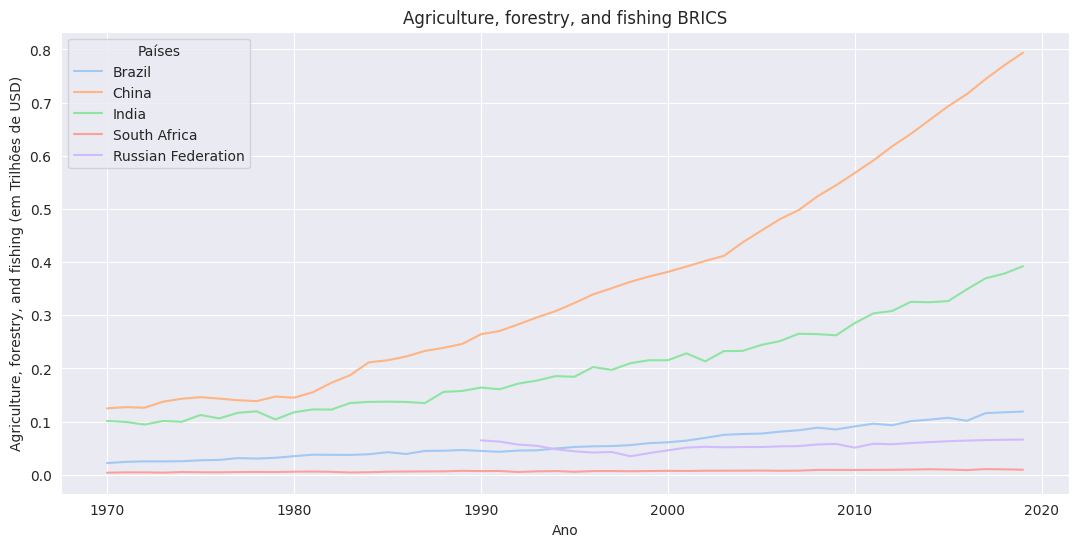

In [29]:
with sns.axes_style("darkgrid"):
  plt.figure(figsize=(13, 6))
  grafico = sns.lineplot(data=agriculture_year_df, x="Year", y="Value", hue="CountryName", errorbar=None, palette="pastel")
  grafico.set(title="Agriculture, forestry, and fishing BRICS", xlabel="Ano", ylabel="Agriculture, forestry, and fishing (em Trilhões de USD)")
  grafico.get_legend().set_title("Países")

O gráfico a seguir mostra o crescimento industrial dos países BRICS, expresso em dólares ajustados pela inflação.

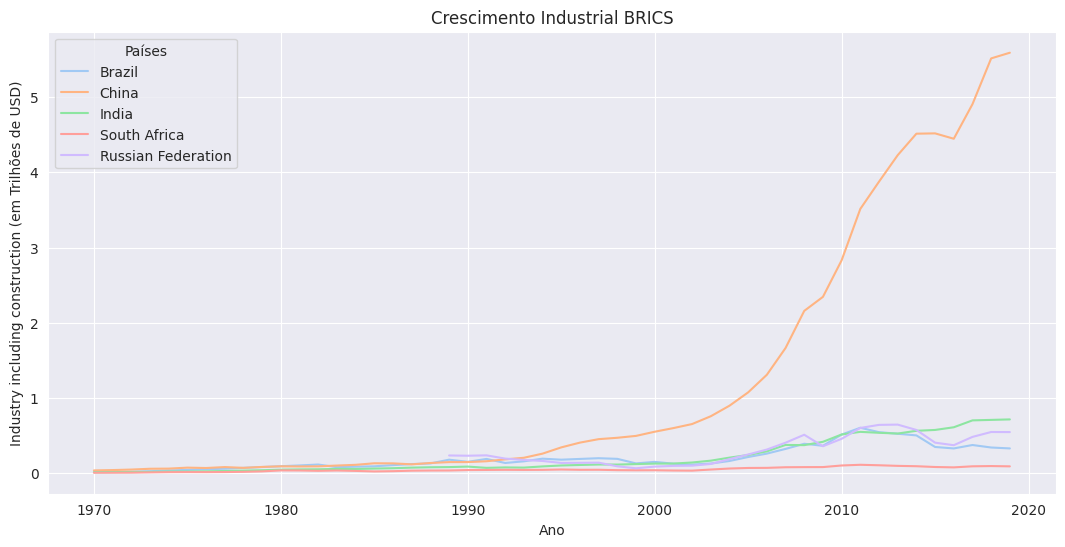

In [30]:
with sns.axes_style("darkgrid"):
  plt.figure(figsize=(13, 6))
  grafico = sns.lineplot(data=manufacturing_year_df, x="Year", y="Value", hue="CountryName", errorbar=None, palette="pastel")
  grafico.set(title="Crescimento Industrial BRICS", xlabel="Ano", ylabel="Industry including construction (em Trilhões de USD)")
  grafico.get_legend().set_title("Países")

#### **4.1\.Heatmap dos Países do BRICS**

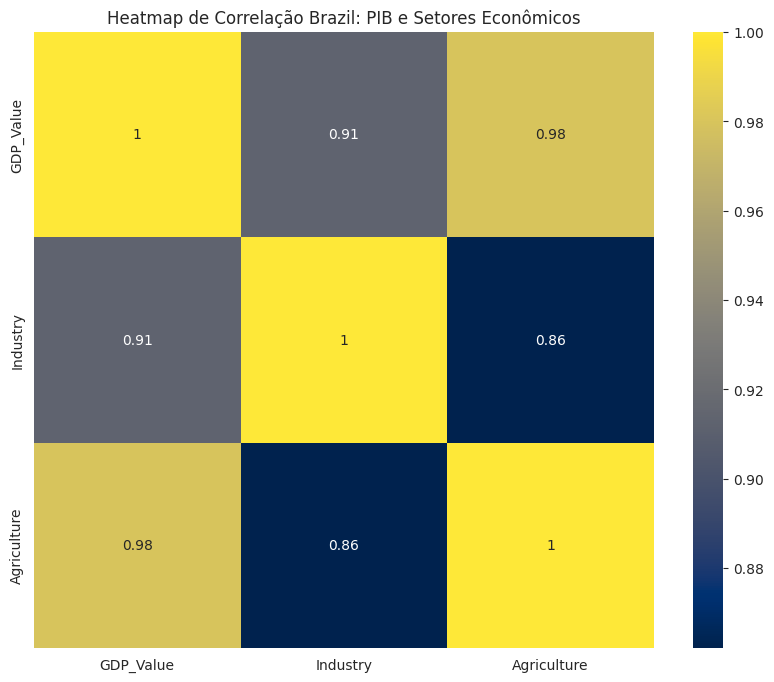

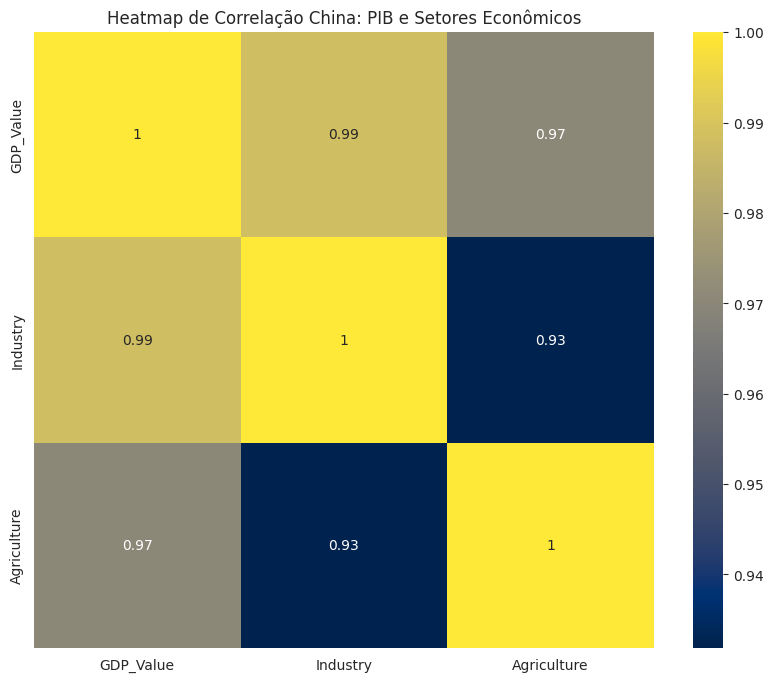

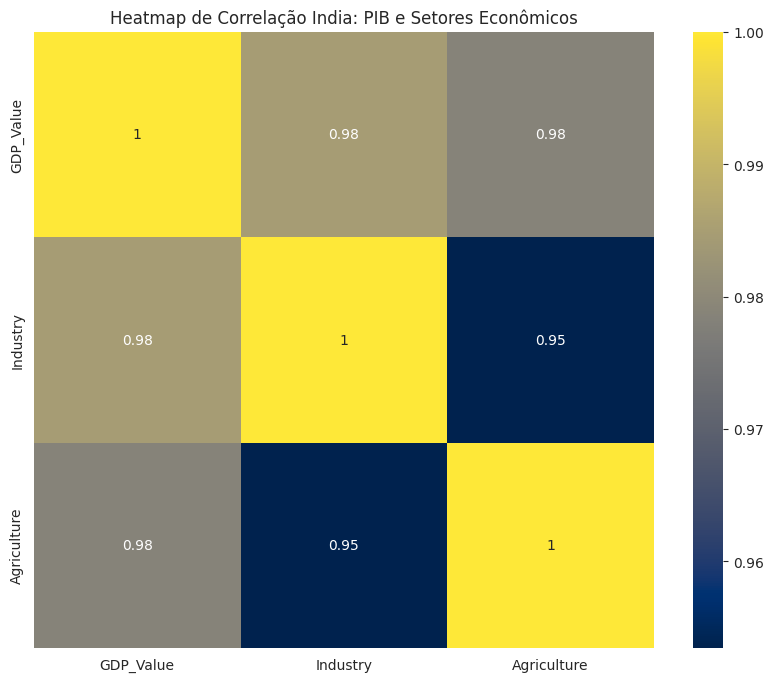

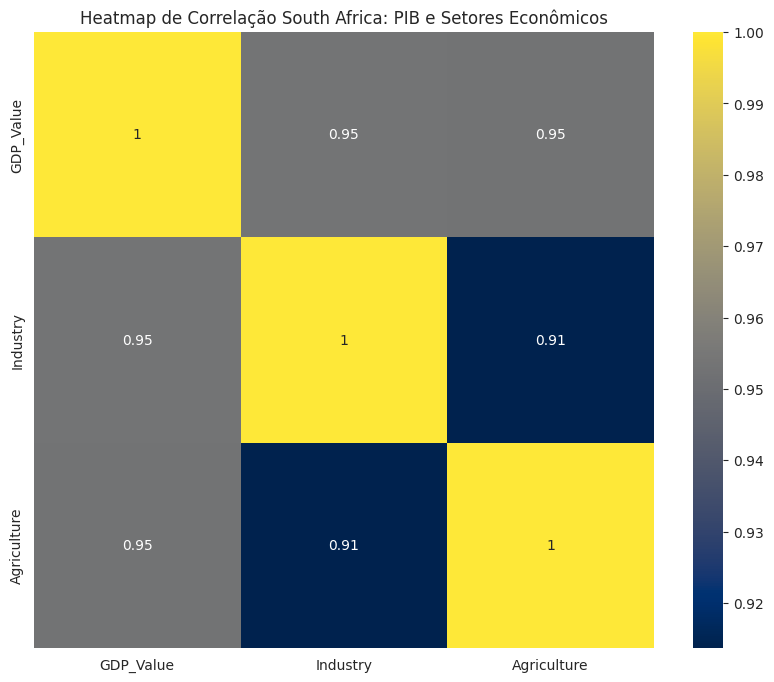

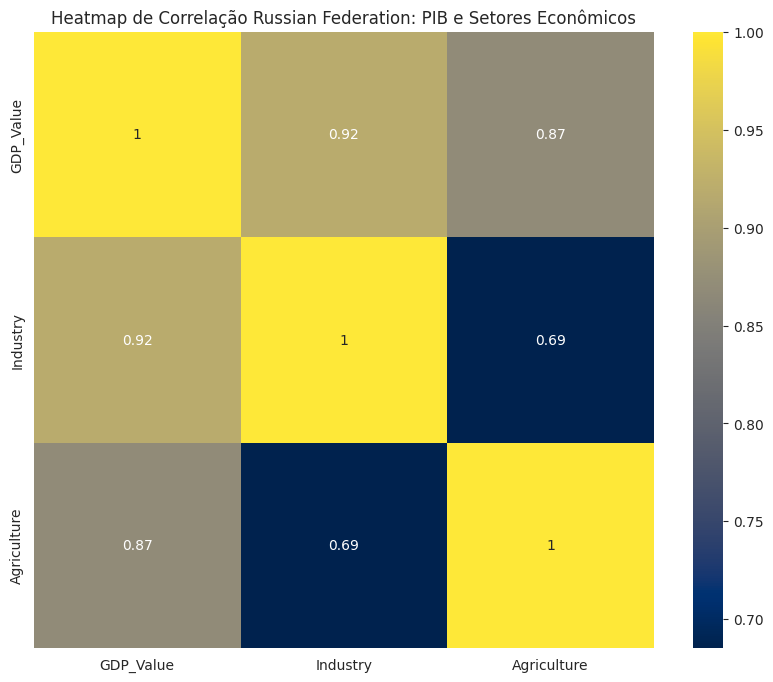

In [31]:
gdp_value_df = gpd_const_year_df.rename(columns={"Value": "GDP_Value"})
industry_value_df = manufacturing_year_df.rename(columns={"Value": "Industry"})
agriculture_value_df = agriculture_year_df.rename(columns={"Value": "Agriculture"})

# Combinar os DataFrames com base em 'Year' e 'CountryName'
merge_df = pd.merge(gdp_value_df, industry_value_df, on=["Year", "CountryName"])
merge_df = pd.merge(merge_df, agriculture_value_df, on=["Year", "CountryName"])
paises = merge_df.loc[:, "CountryName"].unique()
for x in paises:
  country_df = merge_df[merge_df.loc[:, "CountryName"] == x]
  plt.figure(figsize=(10, 8))
  with sns.axes_style("darkgrid"):
    grafico = sns.heatmap(country_df[["GDP_Value", "Industry", "Agriculture"]].corr(), annot=True, cmap="cividis")
    grafico.set(title=f"Heatmap de Correlação {x}: PIB e Setores Econômicos",)



> Os heatmaps de correlação revelam a relação entre o PIB ajustado pela inflação e os valores adicionados pelos setores industrial e agrícola para os países do BRICS:



- **China e Índia:** Demonstram uma forte correlação positiva entre o PIB e ambos os setores econômicos, destacando a importância crucial da indústria e da agricultura para suas economias.
- **Brasil e África do Sul:** Mostram alta correlação entre o PIB e os setores, indicando que tanto a indústria quanto a agricultura são influentes, embora com um impacto ligeiramente menor comparado à China e Índia.
- **Rússia:** Apresenta uma correlação menor com o valor agrícola e uma relação mais fraca entre os setores, sugerindo uma menor interdependência entre o PIB e os setores econômicos.

##**5\.Análise Preditiva para o PIB do Brasil**

Nesta seção, realizamos uma análise preditiva focada no PIB do Brasil, utilizando os setores econômicos de Agricultura, Silvicultura e Pesca, e Indústria como variáveis explicativas. O objetivo é prever a evolução futura do PIB com base nas tendências históricas e nas dinâmicas setoriais identificadas.

###**5.1\.Organização dos DataFrames**

Vamos combinar os DataFrames, renomeando as colunas para evitar conflitos e garantir que cada variável seja claramente identificada.
Depois, vamos unir esses DataFrames em um único DataFrame para realizar a predição.

In [32]:
# Renomeando as colunas dos DataFrames
gpd_predict_df = gpd_const_year_df.rename(columns={"Value": "GDP_Value"})
gni_predict_df = gni_year_df.rename(columns={"Value": "GNI_per_capita"})
agriculture_predict_df = agriculture_year_df.rename(columns={"Value": "Agriculture_Value"})
manufacturing_predict_df = manufacturing_year_df.rename(columns={"Value": "Industry_Value"})

In [33]:
# Removendo a coluna "SeriesName"dos DataFrames
gpd_predict_df = gpd_predict_df.drop(columns=["SeriesName"])
gni_predict_df = gni_predict_df.drop(columns=["SeriesName"])
agriculture_predict_df = agriculture_predict_df.drop(columns=["SeriesName"])
manufacturing_predict_df = manufacturing_predict_df.drop(columns=["SeriesName"])

In [34]:
gpd_predict_df.head()

,CountryName,Year,GDP_Value
45450,Brazil,1970.0,0.447443
45451,China,1970.0,0.186994
45452,India,1970.0,0.219862
45454,South Africa,1970.0,0.137806
45455,Brazil,1971.0,0.497982


###**5.2\.Combinação dos DataFrames em um Único DataFrame**

In [35]:
# Combinando os DataFrames com base em 'Year' e 'CountryName'
merge_brics_df = pd.merge(gpd_predict_df, gni_predict_df, on=["Year", "CountryName"], how="inner")
merge_brics_df = pd.merge(merge_brics_df, agriculture_predict_df, on=["Year", "CountryName"], how="inner")
merge_brics_df = pd.merge(merge_brics_df, manufacturing_predict_df, on=["Year", "CountryName"], how="inner")

In [36]:
merge_brics_df.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value
0,Brazil,1970.0,0.447443,4639.124958,0.021958,0.013623
1,India,1970.0,0.219862,393.753120,0.101245,0.013564
2,South Africa,1970.0,0.137806,6068.391486,0.003796,0.006657
3,Brazil,1971.0,0.497982,5055.505932,0.024188,0.016101
4,India,1971.0,0.223474,391.385882,0.099345,0.015081


In [37]:
# Pegaremos somente o país de interesse
predict_df = merge_brics_df[merge_brics_df.loc[:, "CountryName"] == "Brazil"]

In [38]:
predict_df.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value
0,Brazil,1970.0,0.447443,4639.124958,0.021958,0.013623
3,Brazil,1971.0,0.497982,5055.505932,0.024188,0.016101
6,Brazil,1972.0,0.558003,5544.420768,0.025148,0.019166
9,Brazil,1973.0,0.636004,6150.854737,0.025156,0.026497
12,Brazil,1974.0,0.693513,6575.343155,0.025405,0.036607


In [39]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 200
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CountryName        50 non-null     object 
 1   Year               50 non-null     float64
 2   GDP_Value          50 non-null     float64
 3   GNI_per_capita     50 non-null     float64
 4   Agriculture_Value  50 non-null     float64
 5   Industry_Value     50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


###**5.3\. Padronização dos Dados**

A padronização dos dados é um passo fundamental no processo de análise para garantir que todas as variáveis estejam na mesma escala e formato

In [40]:
data_interesse = predict_df.loc[:, ["GNI_per_capita", "Agriculture_Value", "Industry_Value"]]
data_interesse.head()

,GNI_per_capita,Agriculture_Value,Industry_Value
0,4639.124958,0.021958,0.013623
3,5055.505932,0.024188,0.016101
6,5544.420768,0.025148,0.019166
9,6150.854737,0.025156,0.026497
12,6575.343155,0.025405,0.036607


In [41]:
data_padronizado = data_interesse.apply(lambda x: (x - (x.mean()))/x.std())

data_padronizado = data_padronizado.rename(
  columns={
    "GNI_per_capita": "GNI_per_capita_std"
    ,"Agriculture_Value": "Agriculture_Value_std"
    ,"Industry_Value": "Industry_Value_std"
    })

predict_padro = pd.concat([predict_df, data_padronizado], axis=1)
predict_padro.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value,GNI_per_capita_std,Agriculture_Value_std,Industry_Value_std
0,Brazil,1970.0,0.447443,4639.124958,0.021958,0.013623,-2.225282,-1.317005,-1.207922
3,Brazil,1971.0,0.497982,5055.505932,0.024188,0.016101,-1.987236,-1.239206,-1.191703
6,Brazil,1972.0,0.558003,5544.420768,0.025148,0.019166,-1.707721,-1.205709,-1.171639
9,Brazil,1973.0,0.636004,6150.854737,0.025156,0.026497,-1.361020,-1.205446,-1.123663
12,Brazil,1974.0,0.693513,6575.343155,0.025405,0.036607,-1.118338,-1.196758,-1.057494


###**5.4\. Limpeza**

In [42]:
predict_padro.drop(
    columns=["GNI_per_capita", "Agriculture_Value", "Industry_Value","CountryName"],inplace=True
)

In [43]:
predict_padro.head()

,Year,GDP_Value,GNI_per_capita_std,Agriculture_Value_std,Industry_Value_std
0,1970.0,0.447443,-2.225282,-1.317005,-1.207922
3,1971.0,0.497982,-1.987236,-1.239206,-1.191703
6,1972.0,0.558003,-1.707721,-1.205709,-1.171639
9,1973.0,0.636004,-1.361020,-1.205446,-1.123663
12,1974.0,0.693513,-1.118338,-1.196758,-1.057494


###**5.5\. Treino e Teste**

In [44]:
# Dividindo os dados de treino e teste
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predict_padro.drop(columns=["GDP_Value"])
    ,predict_padro["GDP_Value"]
    ,test_size = 0.25
    ,random_state = 42
)

In [45]:
predictors_train.head(1)

,Year,GNI_per_capita_std,Agriculture_Value_std,Industry_Value_std
24,1978.0,-0.68094,-1.021891,-0.830266


In [46]:
predictors_test.head(1)

,Year,GNI_per_capita_std,Agriculture_Value_std,Industry_Value_std
39,1983.0,-0.99456,-0.782063,-0.771699


### **5.6\.Modelagem**

####**5.6.1\. Treino**

In [47]:
model = sklearn.linear_model.LinearRegression()
model.fit(predictors_train, target_train)

LinearRegression()

In [48]:
# Analisando e definindo os dados
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Year', 'GNI_per_capita_std', 'Agriculture_Value_std',
        'Industry_Value_std'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([0.01728425, 0.16782781, 0.10587126, 0.07312661]),
 'rank_': 4,
 'singular_': array([90.9316062 ,  3.8801928 ,  1.44629063,  1.29468776]),
 'intercept_': -33.031717498015425}

In [49]:
a = model.coef_
print(a)

[0.01728425 0.16782781 0.10587126 0.07312661]


In [50]:
b = model.intercept_
print(b)

-33.031717498015425


####**5.6.2\. Avaliação**

Vamos calcular o RMSE (Root Mean Squared Error) para avaliar o desempenho do modelo de Regressão Linear.

In [51]:
target_predicted = model.predict(predictors_test)

In [52]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.030339159034611162




> **Um valor aceitável de RMSE**



In [53]:
predict_padro.head()

,Year,GDP_Value,GNI_per_capita_std,Agriculture_Value_std,Industry_Value_std
0,1970.0,0.447443,-2.225282,-1.317005,-1.207922
3,1971.0,0.497982,-1.987236,-1.239206,-1.191703
6,1972.0,0.558003,-1.707721,-1.205709,-1.171639
9,1973.0,0.636004,-1.361020,-1.205446,-1.123663
12,1974.0,0.693513,-1.118338,-1.196758,-1.057494


### **5.7\.Predição do PIB para o Novo Ano no Brasil**

Com o nosso modelo treinado e avaliado, procederemos com a previsão do PIB para anos futuros.

In [54]:
ano_brasil = {
    "CountryName": "Brazil"
    ,"Year": [2023.0]
    ,"GDP_Value": [0]
    ,"GNI_per_capita": [7671.42]
    ,"Agriculture_Value": [7978750000.0]
    ,"Industry_Value": [14274704000.0]
}
df_ano = pd.DataFrame(ano_brasil)

In [55]:
df_ano.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value
0,Brazil,2023.0,0,7671.42,7.978750e+09,1.427470e+10




> **Nota: Para realizar a predição, é fundamental ajustar os valores para dólares de 2010, considerando a inflação. Isso garantirá que as previsões sejam consistentes e comparáveis com os dados históricos utilizados no treinamento do modelo.**





#### **5.7.1\.Parametrização para o Novo Ano**

Realizaremos a parametrização e a preparação adequada dos dados para efetuar a predição.

In [56]:
# Colocarmos o ano INT
df_ano.loc[:, "Year"] = df_ano.loc[:, "Year"].astype(int)

In [57]:
df_ano.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value
0,Brazil,2023.0,0,7671.42,7.978750e+09,1.427470e+10


Colocando na ordem correta

In [58]:
df_ano_ajust = df_ano.loc[:, ["Agriculture_Value","Industry_Value"]].apply(lambda x:x/1e12)
df_ano_ajust = df_ano_ajust.rename(columns={
    "Agriculture_Value": "Agriculture_Value_ajustado"
    ,"Industry_Value": "Industry_Value_ajustado"
})
df_ano_ajust.head()

,Agriculture_Value_ajustado,Industry_Value_ajustado
0,0.007979,0.014275


In [59]:
df_ano = pd.concat([df_ano, df_ano_ajust], axis=1)
df_ano.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value,Agriculture_Value_ajustado,Industry_Value_ajustado
0,Brazil,2023.0,0,7671.42,7.978750e+09,1.427470e+10,0.007979,0.014275


In [60]:
df_ano = df_ano.drop(columns=["Agriculture_Value", "Industry_Value"])
df_ano = df_ano.rename(columns={
    "Agriculture_Value_ajustado": "Agriculture_Value"
    ,"Industry_Value_ajustado": "Industry_Value"
})
df_ano.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value
0,Brazil,2023.0,0,7671.42,0.007979,0.014275


Padronização

In [61]:
mean_lenght = predict_df["GNI_per_capita"].mean()
std_lenght = predict_df["GNI_per_capita"].std()
df_ano["GNI_per_capita_std"] = df_ano["GNI_per_capita"].apply(lambda x: (x - mean_lenght)/std_lenght)

mean_depht = predict_df["Agriculture_Value"].mean()
std_depht = predict_df["Agriculture_Value"].std()
df_ano["Agriculture_Value_std"] = df_ano["Agriculture_Value"].apply(lambda x: (x - mean_depht)/std_depht)

mean_flipper = predict_df["Industry_Value"].mean()
std_flipper = predict_df["Industry_Value"].std()
df_ano["Industry_Value_std"] = df_ano["Industry_Value"].apply(lambda x: (x - mean_flipper)/std_flipper)

df_ano.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value,GNI_per_capita_std,Agriculture_Value_std,Industry_Value_std
0,Brazil,2023.0,0,7671.42,0.007979,0.014275,-0.491707,-1.804659,-1.203654


####**5.7.2\. Limpeza**

In [62]:
df_ano.drop(
    columns=["GNI_per_capita", "Agriculture_Value", "Industry_Value","CountryName","GDP_Value"],inplace=True
)

In [63]:
df_ano.head()

,Year,GNI_per_capita_std,Agriculture_Value_std,Industry_Value_std
0,2023.0,-0.491707,-1.804659,-1.203654


In [64]:
GDP_Value = model.predict(df_ano)

####**5.7.3\. Resultado**

In [65]:
print(GDP_Value)

[1.57272451]


In [66]:
mae = mean_absolute_error(target_test, target_predicted)
print(mae)

0.02035863051250087


A análise preditiva realizada neste projeto visou prever o crescimento futuro do PIB do Brasil com base em dados históricos e variáveis econômicas relevantes.<br> Utilizando um modelo de Regressão Linear, conseguimos gerar previsões sobre o PIB para os próximos anos, com foco particular nos setores econômicos de Agricultura, Silvicultura e Pesca, bem como Indústria.

- **MAE (Erro Absoluto Médio):** O MAE obtido foi de 0.0204, indicando que, em média, o erro das previsões em relação aos valores reais é relativamente pequeno.

- **RMSE (Raiz do Erro Quadrático Médio):** O RMSE foi de 0.0303, sugerindo uma boa capacidade do modelo para capturar as tendências do crescimento econômico.

## **6\. Visualização Interativa**

Para realizar nossa visualização interativa, utilizaremos o Looker Studio.

In [67]:
merge_brics_df.head()

,CountryName,Year,GDP_Value,GNI_per_capita,Agriculture_Value,Industry_Value
0,Brazil,1970.0,0.447443,4639.124958,0.021958,0.013623
1,India,1970.0,0.219862,393.753120,0.101245,0.013564
2,South Africa,1970.0,0.137806,6068.391486,0.003796,0.006657
3,Brazil,1971.0,0.497982,5055.505932,0.024188,0.016101
4,India,1971.0,0.223474,391.385882,0.099345,0.015081


Revertendo os valores ao valor inicial, conseguiremos uma representação mais precisa no Looker Studio.

In [68]:
merge_brics_df.loc[:, ["GDP_Value", "Agriculture_Value", "Industry_Value"]] = merge_brics_df.loc[:, ["GDP_Value", "Agriculture_Value", "Industry_Value"]] * 1e12

In [69]:
# Separar os dados para cada país dos BRICS
brazil_df = merge_brics_df[merge_brics_df.loc[:, "CountryName"] == "Brazil"]
china_df = merge_brics_df[merge_brics_df.loc[:, "CountryName"] == "China"]
india_df = merge_brics_df[merge_brics_df.loc[:, "CountryName"] == "India"]
russia_df = merge_brics_df[merge_brics_df.loc[:, "CountryName"] == "Russian Federation"]
africa_df = merge_brics_df[merge_brics_df.loc[:, "CountryName"] == "South Africa"]

Realizamos o download dos dados necessários para a criação da visualização interativa no Looker Studio.

In [70]:
brazil_df.to_csv("./brazil_dados.csv", sep=",", index=False)
china_df.to_csv("./china_dados.csv", sep=",", index=False)
india_df.to_csv("./india_dados.csv", sep=",", index=False)
russia_df.to_csv("./russia_dados.csv", sep=",", index=False)
africa_df.to_csv("./africa_dados.csv", sep=",", index=False)
merge_brics_df.to_csv("./brics_dados.csv", sep=",", index=False)

### **6.1\.Resultados da visualização interativa criada no Looker Studio, que oferece uma visão detalhada das análises econômicas realizadas para os países BRICS.**


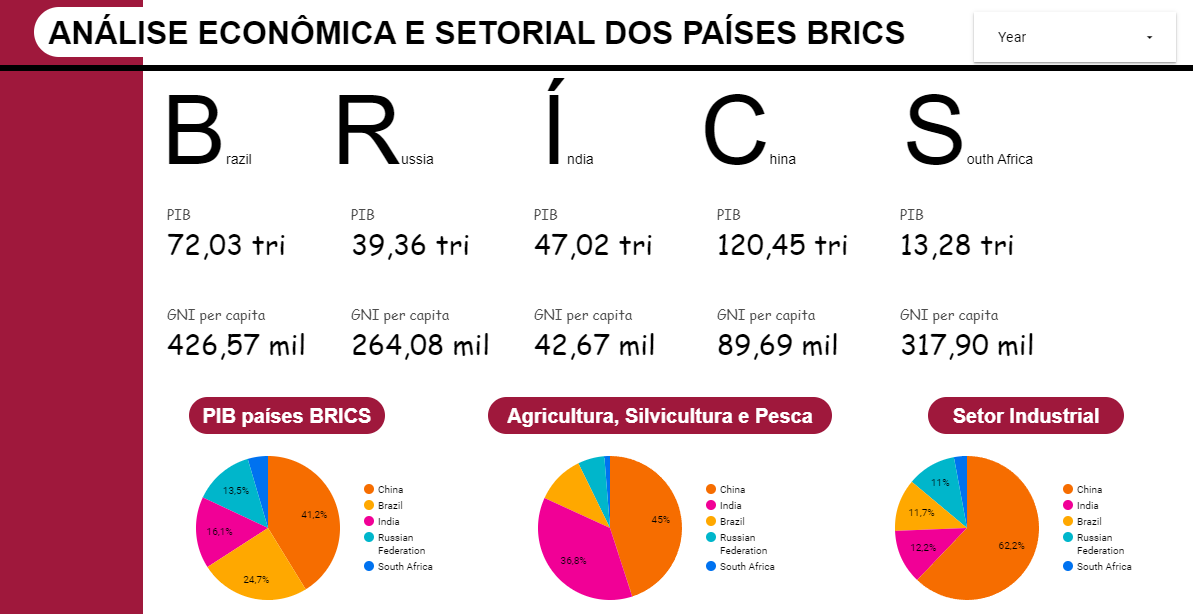

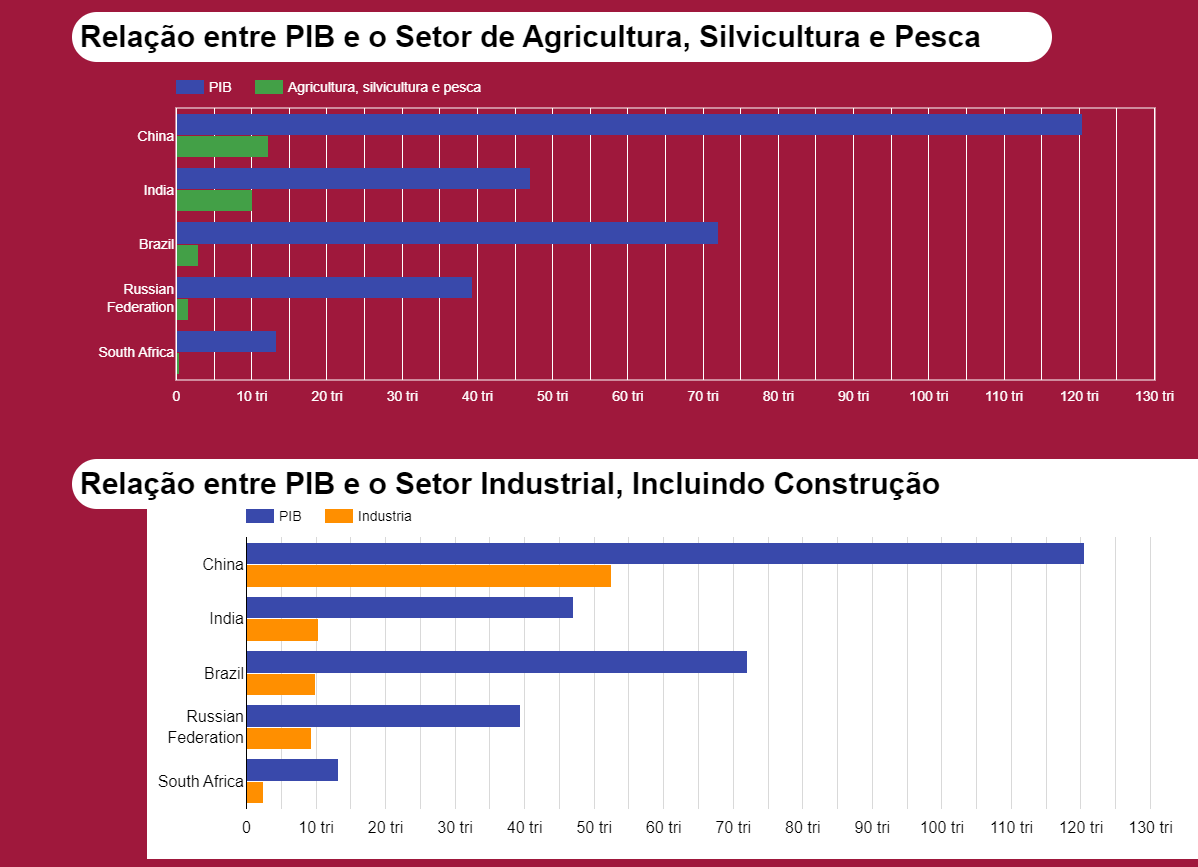

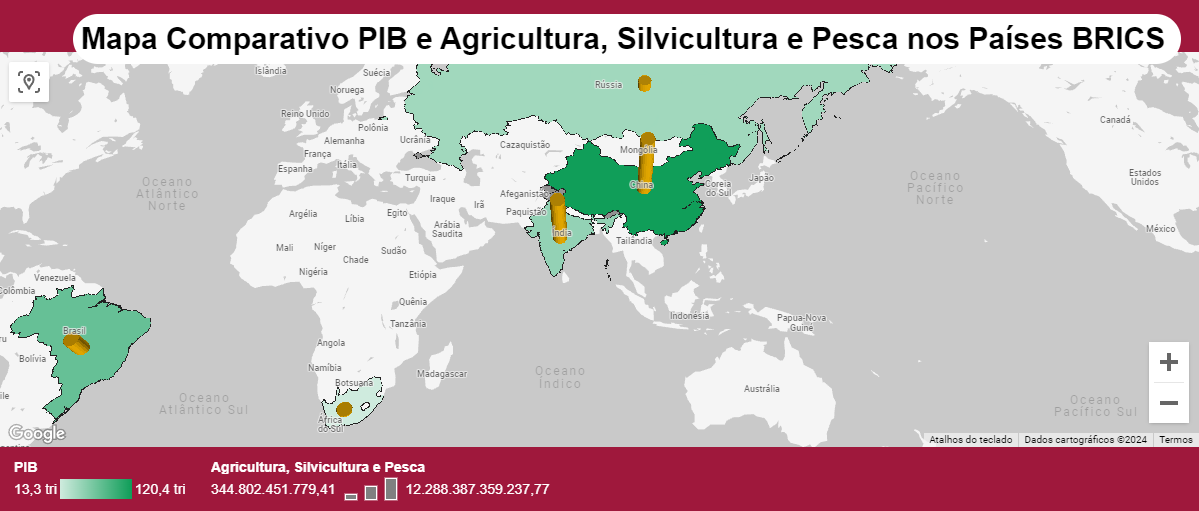

---